# Info
Name:  

    KORUS_AOD_fine_coarse_autocorr
    
Purpose:  

    Analyse some of the AOD values from KORUS AQ
    Split up between fine mode and coarse mode AOD
    Subset for level legs only
        - interpolate within the level legs
    Run autocorrelation values for the distance/time travelled 
  
Input:

    None at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - hdf5 python loader
    - 
    - matplotlib
    - numpy
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - '/aod_ict/all_aod_KORUS_R2_ict.mat'
  
Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2019-05-18
    Modified: 

# Prepare python environment

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
import os
matplotlib.rc_file(os.path.join(os.getcwd(),'file.rc'))
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
import load_utils as lu
import plotting_utils as pu
from path_utils import getpath
import hdf5storage as hs
from datetime import datetime
from scipy.interpolate import UnivariateSpline
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
import scipy.stats as st

In [2]:
import map_utils as mu
from scipy import interpolate

In [3]:
from linfit import linfit
import Sun_utils as su

In [4]:
%matplotlib notebook

In [5]:
fp =getpath('KORUS')

Return path named:  KORUS /mnt/c/Users/sleblanc/Research/KORUS-AQ/


# Load files

Load the KORUS 4STAR AOD ict files for better handling

In [6]:
ar = hs.loadmat(fp+'/aod_ict/all_aod_KORUS_R2_ict.mat')

In [7]:
ka = ar.keys()

In [8]:
ka.sort()

In [9]:
ka

[u'AOD0380',
 u'AOD0452',
 u'AOD0501',
 u'AOD0520',
 u'AOD0532',
 u'AOD0550',
 u'AOD0606',
 u'AOD0620',
 u'AOD0675',
 u'AOD0781',
 u'AOD0865',
 u'AOD1020',
 u'AOD1040',
 u'AOD1064',
 u'AOD1236',
 u'AOD1559',
 u'AOD1627',
 u'GPS_Alt',
 u'Latitude',
 u'Longitude',
 u'Start_UTC',
 u'UNCAOD0380',
 u'UNCAOD0452',
 u'UNCAOD0501',
 u'UNCAOD0520',
 u'UNCAOD0532',
 u'UNCAOD0550',
 u'UNCAOD0606',
 u'UNCAOD0620',
 u'UNCAOD0675',
 u'UNCAOD0781',
 u'UNCAOD0865',
 u'UNCAOD1020',
 u'UNCAOD1040',
 u'UNCAOD1064',
 u'UNCAOD1236',
 u'UNCAOD1559',
 u'UNCAOD1627',
 u'amass_aer',
 u'days',
 u'fl',
 u'fl1',
 u'fl2',
 u'fl_QA',
 u'fl_alt',
 u'fl_alt1',
 u'qual_flag']

In [9]:
nwl = ka[0:17]

In [10]:
nwl

[u'AOD0380',
 u'AOD0452',
 u'AOD0501',
 u'AOD0520',
 u'AOD0532',
 u'AOD0550',
 u'AOD0606',
 u'AOD0620',
 u'AOD0675',
 u'AOD0781',
 u'AOD0865',
 u'AOD1020',
 u'AOD1040',
 u'AOD1064',
 u'AOD1236',
 u'AOD1559',
 u'AOD1627']

In [39]:
nm = [380.0,452.0,501.0,520.0,532.0,550.0,606.0,620.0,675.0,781.0,865.0,1020.0,1040.0,1064.0,1236.0,1559.0,1627.0]

# Run analysis and prepare variables
Do some of the calculations to the data here

In [11]:
fl1 = ar['days']==ar['days'][0]

In [12]:
fl1.shape

(583183,)

In [13]:
fl = ar['fl_QA']==0

## Subset the level legs

In [14]:
def running_std(x,n):
    'Function to do a running standard deviation on array (x) with window size (n)'
    q = x**2
    q = np.convolve(q, np.ones((n, )), mode="valid")
    s = np.convolve(x, np.ones((n, )), mode="valid")
    o = (q-s**2/n)/float(n-1)
    return o 

In [15]:
nbox = 20

In [16]:
std_alt = running_std(ar['GPS_Alt'][fl],nbox)

In [17]:
std_alt.shape

(262570,)

In [18]:
ar['GPS_Alt'][fl].shape

(262589,)

In [19]:
f_level = np.where(std_alt<5.0)[0]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [20]:
ar['GPS_Alt'].shape

(583183,)

In [50]:
ar['Start_UTC'][fl1][f_level]

IndexError: index 30381 is out of bounds for axis 1 with size 30318

<IPython.core.display.Javascript object>


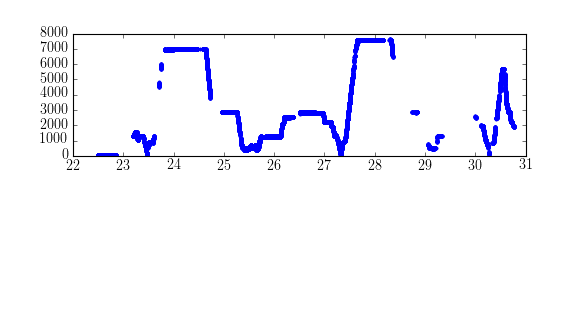

IndexError: index 30381 is out of bounds for axis 1 with size 30318

In [49]:
plt.figure()
ax1 = plt.subplot(2,1,1)
plt.plot(ar['Start_UTC'][fl1],ar['GPS_Alt'][fl1],'.')
plt.plot(ar['Start_UTC'][fl1][f_level],ar['GPS_Alt'][fl1][f_level],'r.')


ax2 = plt.subplot(2,1,2,sharex=ax1)
plt.plot(ar['Start_UTC'][fl1][:1-nbox],std_alt,'.')
plt.plot(ar['Start_UTC'][fl1][f_level],std_alt[f_level],'r.')
plt.ylim(0,100)


<IPython.core.display.Javascript object>


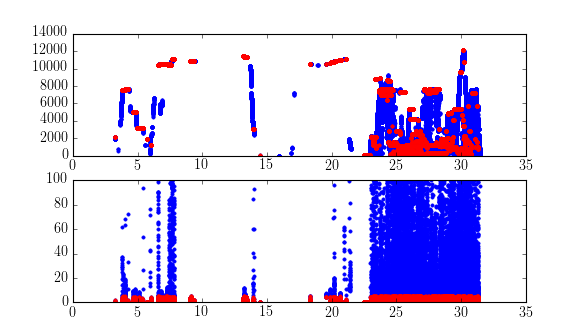

(0, 100)

In [51]:
plt.figure()
ax1 = plt.subplot(2,1,1)
plt.plot(ar['Start_UTC'][fl],ar['GPS_Alt'][fl],'.')
plt.plot(ar['Start_UTC'][fl][f_level],ar['GPS_Alt'][fl][f_level],'r.')


ax2 = plt.subplot(2,1,2,sharex=ax1)
plt.plot(ar['Start_UTC'][fl][:1-nbox],std_alt,'.')
plt.plot(ar['Start_UTC'][fl][f_level],std_alt[[f_level]],'r.')
plt.ylim(0,100)

## Seperate each of the level legs into distinct segments

In [21]:
def get_segments(index,vals_dict,nsep=150,set_nan=True):
    'Function to seperate continuous segments (within a distance of nsep) based on a prior index'
    disc_flacaod_long = np.where(np.diff(index,1)>nsep)[0]
    
    discontinuity_istart_long =  index[np.append(0,disc_flacaod_long[:-1]+1)]
    discontinuity_iend_long =  index[disc_flacaod_long]
    
    kv = vals_dict.keys()
    d = {k:[] for k in kv}
    for i,start in enumerate(discontinuity_istart_long): # loop through discontinuities 
        for k in kv: # loop through keys
            try:
                d[k].append(vals_dict[k][start:discontinuity_iend_long[i]])
            except:
                d[k].append([np.nan])
    
    for k in kv:
        d[k] = np.array(d[k])
        
    return d

In [22]:
vals = {'utc':ar['Start_UTC'][fl],'alt':ar['GPS_Alt'][fl],'lat':ar['Latitude'][fl],'lon':ar['Longitude'][fl],
        'aod0500':ar['AOD0501'][fl],'aod1040':ar['AOD1040'][fl]}

In [23]:
dvals = get_segments(f_level,vals,nsep=100)

In [24]:
dvals.keys()

['aod1040', 'utc', 'aod0500', 'lon', 'lat', 'alt']

In [31]:
for n in dvals['utc']:
    try:
        print (n[-1]-n[0])*60.0
    except:
        print np.nan

20.55
1.76666666667
4.0
37.6833333333
1.96666666667
16.2
nan
1.1
1.65
29.8166666667
18.4166666667
1.06666666667
0.0333333333332
1.68333333333
16.4833333333
4.28333333333
0.0166666666667
1.06666666667
0.516666666667
0.0
0.0
0.0
1.3
0.816666666667
2.45
1.18333333333
0.133333333333
0.166666666667
34.3333333333
3.58333333333
0.683333333333
0.583333333333
4.15
0.15
32.1166666667
35.2666666667
1.86666666667
4.3
1.45
22.8333333333
3.21666666667
1.95
0.0333333333334
0.0333333333334
0.333333333333
0.766666666667
4.95
13.05
14.6666666667
6.93333333333
2.2
16.1833333333
21.95
7.9
5.13333333333
0.416666666667
37.8833333333
0.816666666667
1.88333333333
1.16666666667
2.53333333333
0.883333333333
0.05
3.35
0.283333333333
4.68333333333
5.43333333333
0.25
1.48333333333
1.4
0.0999999999999
0.35
2.75
5.05
0.966666666667
11.6166666667
5.4
0.983333333333
0.4
30.2666666667
2.95
6.6
5.7
13.8
25.8833333333
19.3166666667
7.41666666667
2.16666666667
0.0333333333334
0.0333333333332
0.0833333333334
0.066666666666

In [25]:
def discrete_matshow(data,cmapname='RdBu'):
    ' plotting function for a discrete colormap'
    cmap = plt.get_cmap(cmapname, np.nanmax(data)-np.nanmin(data)+1)
    # set limits .5 outside true range
    scalarmap = plt.cm.ScalarMappable(cmap=cmapname)
    scalarmap.set_array(data)
    #mat = plt.matshow(data,cmap=cmap,vmin = np.min(data)-.5, vmax = np.max(data)+.5)
    #tell the colorbar to tick at integers
    cax = plt.colorbar(scalarmap, ticks=np.arange(np.min(data),np.max(data)+1))
    return cax

In [112]:
for q in np.unique(ar['days']):
    flq = ar['days']==q
    plt.figure()
    plt.plot(ar['Start_UTC'][flq],ar['GPS_Alt'][flq],'.')
    plt.plot(ar['Start_UTC'][f_level][flq],ar['GPS_Alt'][f_level][flq],'r.')
    ax = plt.gca()

    ax.set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(dvals['utc'])+1)])

    for i,n in enumerate(dvals['utc']):
        plt.plot(n,dvals['alt'][i],'s-',markeredgecolor='None')

    plt.xlabel('UTC [h from midnight]')
    plt.ylabel('Altitude [m]')
    plt.title('Days: {}'.format(q))

    #scalarmap = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('gist_ncar'))
    #scalarmap.set_array(range(len(dvals['utc'])+1))
    #cb = plt.colorbar(scalarmap)
    cb = discrete_matshow(range(len(dvals['utc'])+1),cmapname='gist_ncar')
    cb.set_label('Level leg number')
#plt.plot(ar['Start_UTC'][fl1][f_level],ar['GPS_Alt'][fl1][f_level],'r.')

<IPython.core.display.Javascript object>

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 62387 but corresponding boolean dimension is 583183
  """


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

IndexError: index 62387 is out of bounds for axis 1 with size 62387

## Now calculate the distances travelled within each segments

In [26]:
def get_distances(seg_dict):
    'Function that calculates the cumulative distance and instantaneous change between each point for a set of segments'
    seg_dict['dist'],seg_dict['cumdist'] = [],[]
    for i,l in enumerate(seg_dict['lat']):
        try:
            ckm,km = [],[]
            pos1 = [seg_dict['lat'][i][0],seg_dict['lon'][i][0]] 
            for j,a in enumerate(seg_dict['lat'][i]):
                d = mu.spherical_dist(pos1,[seg_dict['lat'][i][j],seg_dict['lon'][i][j]])
                ckm.append(d)
                km.append(d)
        except:
            cckm,dkm = [np.nan],[np.nan]

        iu = np.where(np.isfinite(ckm))[0]
        try:
            fckm = interpolate.interp1d(seg_dict['utc'][i][iu],np.array(ckm)[iu])
            fkm = interpolate.interp1d(seg_dict['utc'][i][iu],np.array(km)[iu])
            cckm = fckm(seg_dict['utc'][i])
            dkm = fkm(seg_dict['utc'][i])
            seg_dict['cumdist'].append(np.array(cckm))
            seg_dict['dist'].append(np.array(np.diff(dkm)))
        except:
            seg_dict['cumdist'].append(np.array(np.nan))
            seg_dict['dist'].append(np.array(np.nan))

    return seg_dict

In [27]:
ddv = get_distances(dvals)

In [34]:
dvals['cumdist']

[array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 array([  0.        ,   0.13553117,   0.21732422,   0.3952947 ,
          0.52353227,   0.6109375 ,   0.69913303,   0.85572713,
          1.01275611,   1.13067166,   1.24151063,   1.35416386,
          1.4747242 ,   1.58563553,   1.69754659,   1.81487912,
          2.00853783,   2.17334725,   2.28865409,   2.40513692,
          2.51684993,   2.62901085,   2.7489336 ,   2.85954252,
          2.97963177,   3.09293486,   3.21026377,   3.40135015,
          3.568277  ,   3.6841054 ,   3.79623056,   3.91015623,
          4.02871423,   4.14551536,   4.26441988,   4.37685231,
          4.49289822,   4.61127746,   4.80238773,   4.96931961,
          5.08513751,   5.20193328,   5.32317025,   5.43473734,
          5.55168217,   5.67219021,   5.78749063,   5.9000378 ,
          6.02079798,   6.21348437,   6.38041724,   6.49831147,
          6.61640109,   6.73547023,   6.85015037,   6.9629817 ,
          7.08638851,   7.19902982,   7.32231389,   7.43631

In [28]:
dvals.keys()

['aod1040', 'utc', 'dist', 'aod0500', 'lon', 'cumdist', 'lat', 'alt']

## Calculate the autocorrelation of AOD with respect to distance

In [29]:
def autocorr(x, t=1):
    return np.corrcoef(np.array([x[:-t], x[t:]]))

In [30]:
def autocorr2(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]/result.max()

In [31]:
def autocorr5(x):
    '''numpy.correlate, non partial'''
    n = len(x)
    lags = range(n)
    #mean=x.mean()
    var=np.nanvar(x)
    xp=x-np.nanmean(x)
    corr=np.correlate(xp,xp,'full')[n-1:]/var/n

    return corr[:n]

In [32]:
authcor = autocorr(dvals['aod0500'][1])
authcor2 = autocorr2(dvals['aod0500'][1])
authcor3 = autocorr5(dvals['aod0500'][1])

In [35]:
len(authcor2)

107

In [36]:
len(dvals['aod0500'][1])

107

In [36]:
dvals['dist'][1]

array([ 0.13553117,  0.08179305,  0.17797048,  0.12823757,  0.08740522,
        0.08819553,  0.1565941 ,  0.15702898,  0.11791555,  0.11083897,
        0.11265322,  0.12056035,  0.11091132,  0.11191107,  0.11733252,
        0.19365872,  0.16480942,  0.11530684,  0.11648283,  0.11171301,
        0.11216091,  0.11992276,  0.11060892,  0.12008925,  0.11330309,
        0.11732891,  0.19108638,  0.16692686,  0.1158284 ,  0.11212516,
        0.11392566,  0.11855801,  0.11680113,  0.11890452,  0.11243243,
        0.11604591,  0.11837923,  0.19111028,  0.16693188,  0.1158179 ,
        0.11679577,  0.12123696,  0.11156709,  0.11694483,  0.12050804,
        0.11530042,  0.11254717,  0.12076019,  0.19268638,  0.16693287,
        0.11789423,  0.11808962,  0.11906914,  0.11468014,  0.11283133,
        0.12340681,  0.11264132,  0.12328406,  0.11399685,  0.1937896 ,
        0.16940478,  0.117724  ,  0.11809505,  0.11730556,  0.11851182,
        0.11635406,  0.11061306,  0.12442276,  0.11394347,  0.12

In [37]:
[(dvals['dist'][i].mean(),np.size(dvals['dist'][i])) for i in xrange(len(dvals['dist']))]

[(0.0, 1233),
 (0.12769972900379792, 106),
 (0.060329418681545996, 217),
 (0.46684791675203891, 876),
 (0.42854297280541953, 43),
 (0.30944986180100803, 373),
 (nan, 1),
 (0.11969945983601073, 66),
 (0.11561769594085053, 99),
 (0.31266885835266134, 691),
 (0.89852734169563664, 189),
 (0.11203312939053615, 64),
 (0.1362411462276964, 2),
 (0.12625667328033832, 99),
 (0.3518537685232237, 534),
 (0.22563165705828808, 228),
 (0.2422249269639766, 1),
 (0.18705845351349554, 64),
 (0.15639847394854861, 31),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (0.1424395104900994, 78),
 (0.14193941842352015, 49),
 (0.1375150594025191, 147),
 (0.17953972116492559, 71),
 (0.0037632291342717741, 8),
 (0.09478282903723087, 10),
 (0.24565235843987421, 1677),
 (0.14988653744956412, 215),
 (0.13332676241353142, 41),
 (0.12846147677463815, 35),
 (0.13497320776081248, 219),
 (0.11396574950777692, 9),
 (0.15542144845724096, 1478),
 (0.23084456525325836, 1350),
 (0.22859646305653619, 90),
 (0.11027499231534812, 258),
 (0.11

### interpolate AODs to a constant distance grid

In [33]:
def interp_dist(d,dist=0.12):
    'function to insterpolate the AOD from the dict to an even grid spacing accroding to distance (default 0.12 km)'
    d['cdist_n'],d['aod_n'] = [],[]
    for i,cd in enumerate(d['cumdist']):
        d['cdist_n'].append(np.arange(cd.min(),cd.max(),dist))
        try:
            fcd = interpolate.interp1d(cd,d['aod0500'][i])
            d['aod_n'].append(fcd(d['cdist_n'][i]))
        except TypeError:
            d['aod_n'].append(np.array(np.nan))

In [43]:
dvals['aod0500']

array([array([ 0.573,  0.57 ,  0.569, ...,  1.95 ,  1.966,  1.966]),
       array([ 1.755,  1.755,  1.601,  1.352,  1.352,  1.265,  1.239,  1.233,
        1.233,  1.188,  1.14 ,  1.156,  1.15 ,  1.105,  1.149,  1.169,
        1.116,  1.052,  1.052,  0.947,  0.836,  0.799,  0.703,  0.682,
        0.698,  0.695,  0.649,  0.637,  0.587,  0.587,  0.609,  0.633,
        0.65 ,  0.665,  0.706,  0.82 ,  0.968,  1.004,  1.017,  1.02 ,
        1.02 ,  1.008,  1.099,  1.166,  1.187,  1.244,  1.243,  1.198,
        1.218,  1.229,  1.225,  1.225,  1.224,  1.141,  1.152,  1.176,
        1.155,  1.113,  1.073,  1.062,  1.062,  1.019,  1.019,  1.018,
        1.012,  0.992,  1.02 ,  1.018,  0.95 ,  0.887,  0.858,  0.821,
        0.768,  0.768,  0.685,  0.625,  0.601,  0.615,  0.612,  0.629,
        0.628,  0.617,  0.614,  0.568,  0.568,  0.521,  0.492,  0.493,
        0.507,  0.516,  0.534,  0.534,  0.543,  0.58 ,  0.6  ,  0.6  ,
        0.61 ,  0.612,  0.621,  0.645,  0.643,  0.635,  0.644,  0.655,
 

In [34]:
interp_dist(dvals)

In [35]:
dvals['autocor'] = [] 
for i,a in enumerate(dvals['aod_n']):
    try:
        dvals['autocor'].append(autocorr5(a))
    except:
        dvals['autocor'].append(np.array(np.nan))

/usr/lib/python2.7/dist-packages/numpy/lib/nanfunctions.py:1147: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)
/usr/lib/python2.7/dist-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  


### Autocorrelation plots

<IPython.core.display.Javascript object>


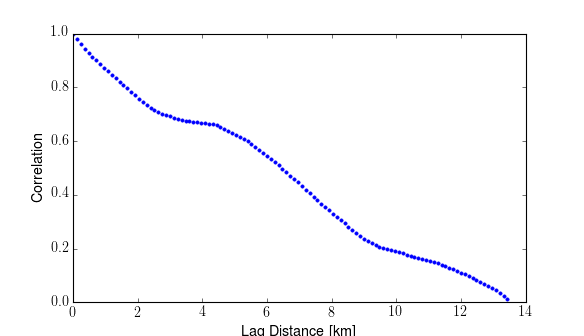

In [76]:
plt.figure()
plt.plot(dvals['cdist_n'][1],dvals['autocor'][1],'.')
plt.xlabel('Lag Distance [km]')
plt.ylabel('Correlation')

<IPython.core.display.Javascript object>


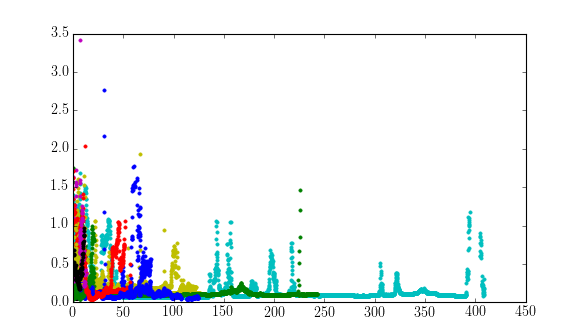

In [78]:
plt.figure()
for i,j in enumerate(dvals['cdist_n']):
    try:
        plt.plot(j,dvals['aod_n'][i],'.')
    except:
        pass

<IPython.core.display.Javascript object>


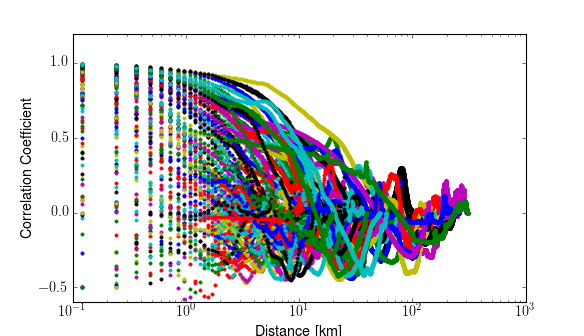

In [46]:
plt.figure()
for i,j in enumerate(dvals['cdist_n']):
    try:
        plt.plot(j,dvals['autocor'][i],'.')
    except:
        pass
plt.ylabel('Correlation Coefficient')
plt.xlabel('Distance [km]')
plt.xscale('log')

## Now get the angstrom exponent and plot it vertically

In [40]:
nwl,nm

([u'AOD0380',
  u'AOD0452',
  u'AOD0501',
  u'AOD0520',
  u'AOD0532',
  u'AOD0550',
  u'AOD0606',
  u'AOD0620',
  u'AOD0675',
  u'AOD0781',
  u'AOD0865',
  u'AOD1020',
  u'AOD1040',
  u'AOD1064',
  u'AOD1236',
  u'AOD1559',
  u'AOD1627'],
 [380.0,
  452.0,
  501.0,
  520.0,
  532.0,
  550.0,
  606.0,
  620.0,
  675.0,
  781.0,
  865.0,
  1020.0,
  1040.0,
  1064.0,
  1236.0,
  1559.0,
  1627.0])

In [41]:
aodrr = np.array([ar[n] for n in nwl])

In [42]:
aodrr.shape

(17, 583183)

In [43]:
angs = su.calc_angs(ar['Start_UTC'],np.array(nm[1:11]),aodrr[1:11,:])

HBox(children=(IntProgress(value=0, max=583185), HTML(value=u'')))

Sun_utils.py:607: RuntimeWarning: divide by zero encountered in log10
  c,cm = linfit(np.log10(w),-np.log10(aod[:,i]))
linfit.py:224: RuntimeWarning: invalid value encountered in double_scalars
  yint = (sy - sx * slope)/s
Sun_utils.py:607: RuntimeWarning: invalid value encountered in log10
  c,cm = linfit(np.log10(w),-np.log10(aod[:,i]))


583185/|/100%|| 583185/583185 [00:30<00:00, 26634.34it/s]

In [44]:
def make_bined_alt(x,alt,days,fl,n=70):
    'Function to create binned data for a set range, usually for altitude'
    binned_ang,binned_alt,binned_num,binned_ndays = [],[],[],[]
    for i in xrange(70):
        flaa = (alt[fl]>=i*100.0) & (alt[fl]<(i+1.0)*100.0)
        binned_ang.append(x[fl][flaa])
        binned_alt.append(np.mean([i*100.0,(i+1.0)*100.0]))
        binned_num.append(len(x[fl][flaa]))
        binned_ndays.append(len(np.unique(days[fl][flaa])))
    return binned_ang,binned_alt,binned_num,binned_ndays

In [45]:
ar['fl_QA_angs'] = ar['fl'] & (ar['AOD0501']>0.05) 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [46]:
ar['fl_QA_angs_seoul'] = ar['fl'] & (ar['AOD0501']>0.05) & (ar['Latitude']<37.75) &\
                        (ar['Latitude']>36.9) & (ar['Longitude']<127.30) & (ar['Longitude']>126.60)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [47]:
any(ar['fl_QA_angs_seoul'])

True

In [70]:
bang,balt,bnum,bndays = make_bined_alt(angs,ar['GPS_Alt'],ar['days'],ar['fl_QA_angs'],n=90)

In [71]:
bangs,balts,bnums,bndayss = make_bined_alt(angs,ar['GPS_Alt'],ar['days'],ar['fl_QA_angs_seoul'],n=90)

### Plotting of the angstrom vertical dependence

<IPython.core.display.Javascript object>


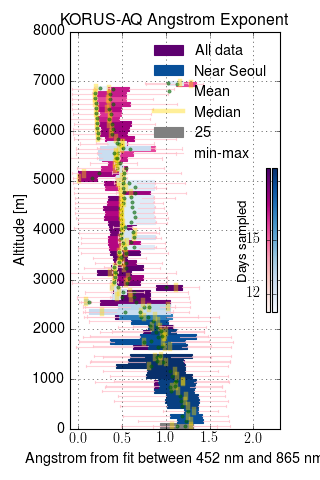

In [128]:
plt.figure(figsize=(4,6))
bp =plt.boxplot(bang,positions=np.array(balt)-5.0,vert=False,
                showfliers=False,widths=90,showmeans=True,patch_artist=True)
plt.xlabel('Angstrom from fit between 452 nm and 865 nm')
plt.ylabel('Altitude [m]')
gr = plt.cm.RdPu
bl = plt.cm.Blues
pu.set_box_whisker_color(gr,bp,bndays)
    
bpc =plt.boxplot(bangs,positions=np.array(balts)+10.0,vert=False,
                 showfliers=False,widths=90,showmeans=True,patch_artist=True)
pu.set_box_whisker_color(bl,bpc,bndayss)
bpc['boxes'][0].set_color('grey')

ax = plt.gca()
plt.title('KORUS-AQ Angstrom Exponent')
plt.ylim(0,8000)
plt.yticks([0,1000,2000,3000,4000,5000,6000,7000,8000])
ax.set_yticklabels([0,1000,2000,3000,4000,5000,6000,7000,8000])
plt.xlim(-0.1,2.3)
plt.grid()
plt.legend([bp['boxes'][5],bpc['boxes'][18],bpc['means'][0],bpc['medians'][0],bpc['boxes'][0],bpc['whiskers'][0]],
           ['All data','Near Seoul','Mean','Median','25% - 75%','min-max'],
           frameon=False,loc=1,numpoints=1)

scalarmapgr = plt.cm.ScalarMappable(cmap=gr)
scalarmapgr.set_array(bndays)
scalarmapbl = plt.cm.ScalarMappable(cmap=bl)
scalarmapbl.set_array(bndays)
cbaxesgr = plt.gcf().add_axes([0.83, 0.35, 0.015, 0.3])
cbg = plt.colorbar(scalarmapgr,cax=cbaxesgr)
cbaxesbl = plt.gcf().add_axes([0.85, 0.35, 0.015, 0.3])
cbb = plt.colorbar(scalarmapbl,cax=cbaxesbl)
cbg.set_ticks([0,3,6,9,12,15])
cbb.set_ticks([0,3,6,9,12,15]),cbb.set_ticklabels(['','','','',''])
cbaxesgr.yaxis.set_ticks_position('left'),cbaxesbl.yaxis.set_ticks_position('left')
cbaxesgr.text(-6.0,0.5,'Days sampled',rotation=90,verticalalignment='center')

plt.tight_layout()

plt.savefig(fp+'plot/KORUS_4STAR_Angstrom_fit_vertical.png',
            transparent=True,dpi=500)

## Calculate the Fine mode fraction

In [48]:
fmf = su.sda(aodrr[1:13,:],np.array(nm[1:13])/1000.0)

HBox(children=(IntProgress(value=0, max=583185), HTML(value=u'')))

Sun_utils.py:418: RuntimeWarning: divide by zero encountered in log
  cc = polyfit(np.log(wvl),np.log(aod),polynum)
Sun_utils.py:418: RuntimeWarning: invalid value encountered in log
  cc = polyfit(np.log(wvl),np.log(aod),polynum)


In [49]:
fmf.keys()

['tauc', 'alphap', 'tauf', 'tau', 'poly', 'eta', 'alpha']

In [50]:
ar['fl_QA_low'] = ar['fl_QA'] & (ar['GPS_Alt']<500.0)
ar['fl_QA_mid'] = ar['fl_QA'] & (ar['GPS_Alt']>2000.0) & (ar['GPS_Alt']<5000.0) 


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [51]:
ar['fl_QA_fmf'] = ar['fl_QA'] & (np.isfinite(fmf['tauf'])) & (np.isfinite(fmf['tauc']))

In [52]:
bfaod,baltf,bnumf,bndaysf = make_bined_alt(fmf['tauf'],ar['GPS_Alt'],ar['days'],ar['fl_QA_fmf'],n=90)
bcaod,baltc,bnumc,bndaysc = make_bined_alt(fmf['tauc'],ar['GPS_Alt'],ar['days'],ar['fl_QA_fmf'],n=90)
beta,balte,bnume,bndayse = make_bined_alt(fmf['eta'],ar['GPS_Alt'],ar['days'],ar['fl_QA_fmf'],n=90)

In [53]:
blat,baltl,bnuml,bndaysl = make_bined_alt(ar['Latitude'],ar['GPS_Alt'],ar['days'],ar['fl_QA_fmf'],n=90)
blon,baltlo,bnumlo,bndayslo = make_bined_alt(ar['Longitude'],ar['GPS_Alt'],ar['days'],ar['fl_QA_fmf'],n=90)

583185/|/100%|| 583185/583185 [01:35<00:00, 7578.34it/s]

In [54]:
blats = [np.nanmedian(ll) for ll in blat]
blons = [np.nanmedian(ll) for ll in blon]

In [90]:
blons

[-149.98910000000001,
 126.12313779999999,
 126.65381360000001,
 126.4886552,
 127.1281,
 127.32114919999999,
 127.2359708,
 127.2046137,
 127.14304390000001,
 127.1601344,
 127.1606122,
 127.00119480000001,
 126.90518785,
 127.42745955000001,
 126.95736264999999,
 127.02680789999999,
 127.3059449,
 127.3743758,
 127.3411138,
 127.32306635,
 127.47791185,
 127.2584296,
 127.2898993,
 127.47796245000001,
 126.8234029,
 126.92522649999999,
 127.51896975,
 127.47839999999999,
 126.87634489999999,
 127.52080530000001,
 127.47686179999999,
 128.39919265,
 127.46392815,
 127.467461,
 128.41734845000002,
 127.469979,
 127.4882752,
 127.50116735,
 126.82570990000001,
 127.531677,
 127.55323344999999,
 127.58127114999999,
 126.99032579999999,
 127.6203627,
 127.63433664999999,
 127.63790815,
 127.6442557,
 124.2892319,
 127.6469683,
 127.63876740000001,
 126.95364925,
 127.3740899,
 127.5705,
 127.46281429999999,
 127.56150839999999,
 127.54370900000001,
 127.51926324999999,
 127.48308965,
 127

### Plot the fine mode fraction distribution

<IPython.core.display.Javascript object>


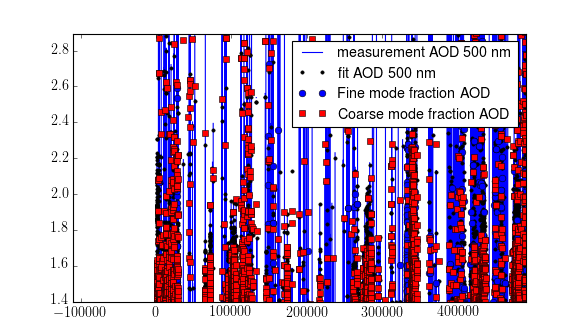

(0, 1.5)

In [87]:
plt.figure()
plt.plot(aodrr[2,:],label='measurement AOD 500 nm')
plt.plot(fmf['tau'],'.k',label='fit AOD 500 nm')
plt.plot(fmf['tauf'], 'ob',label='Fine mode fraction AOD')
plt.plot(fmf['tauc'],'sr',label='Coarse mode fraction AOD')
plt.legend()
plt.ylim(0,1.5)

<IPython.core.display.Javascript object>


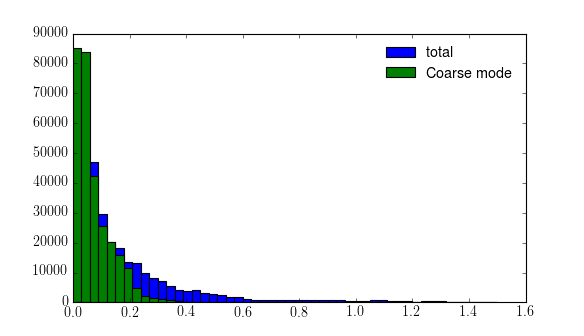

In [96]:
plt.figure()
plt.hist(fmf['tauc'][ar['fl_QA']]+fmf['tauf'][ar['fl_QA']],range=[0,1.5],bins=50,label='total')
plt.hist(fmf['tauc'][ar['fl_QA']],range=[0,1.5],bins=50,label='Coarse mode')
plt.legend(frameon=False)

In [106]:
any(ar['fl_QA_mid'])

True

### Plot the histogram distribution of the fine mode fraction

<IPython.core.display.Javascript object>


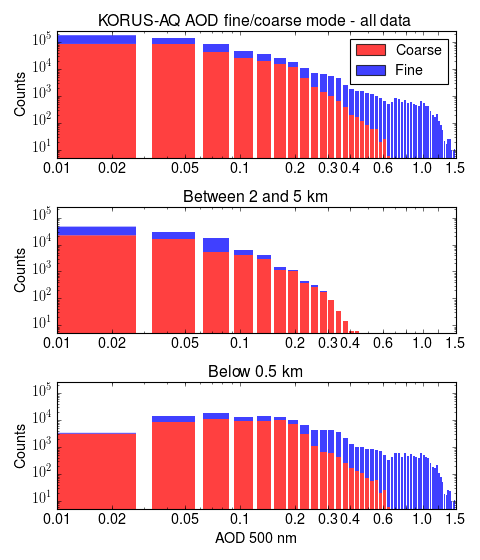

In [61]:
plt.figure(figsize=(6,7))
ax1 = plt.subplot(3,1,1)
plt.hist([fmf['tauc'][ar['fl_QA']],fmf['tauf'][ar['fl_QA']]],color=['r','b'],histtype='bar',
            bins=50,range=[0.0,1.5],label=['Coarse','Fine'],edgecolor='None',alpha=0.75,normed=False,stacked=True)
plt.legend(frameon=True,loc=1)
plt.title('KORUS-AQ AOD fine/coarse mode - all data')
#plt.xlabel('AOD 500 nm')
plt.ylabel('Counts')
plt.yscale('log'),plt.xscale('log')
plt.ylim(5,250000),plt.xlim(0.01,1.5)
plt.xticks([0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.6,0.8,1.0,1.2,1.5])
ax1.set_xticklabels([0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.6,'',1.0,'',1.5])

ax2 = plt.subplot(3,1,2,sharex=ax1)
plt.hist([fmf['tauc'][ar['fl_QA_mid']],fmf['tauf'][ar['fl_QA_mid']]],color=['r','b'],histtype='bar',
            bins=50,range=[0.0,1.5],label=['Coarse','Fine'],edgecolor='None',alpha=0.75,normed=False,stacked=True)
#plt.legend(frameon=False)
plt.title('Between 2 and 5 km')
plt.ylabel('Counts')
plt.yscale('log'),plt.xscale('log')
plt.ylim(5,250000),plt.xlim(0.01,1.5)
plt.xticks([0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.6,0.8,1.0,1.2,1.5])
ax2.set_xticklabels([0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.6,'',1.0,'',1.5])

ax3 = plt.subplot(3,1,3,sharex=ax2)
plt.hist([fmf['tauc'][ar['fl_QA_low']],fmf['tauf'][ar['fl_QA_low']]],color=['r','b'],histtype='bar',
            bins=50,range=[0.0,1.5],label=['Coarse','Fine'],edgecolor='None',alpha=0.75,normed=False,stacked=True)
#plt.legend(frameon=False)
plt.title('Below 0.5 km')
#plt.xlabel('AOD 500 nm')
plt.ylabel('Counts')
plt.yscale('log'),plt.xscale('log')
plt.ylim(5,250000),plt.xlim(0.01,1.5)
plt.xlabel('AOD 500 nm')
plt.xticks([0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.6,0.8,1.0,1.2,1.5])
ax3.set_xticklabels([0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.6,'',1.0,'',1.5])

plt.tight_layout()

plt.savefig(fp+'plot/KORUS_4STAR_fine_mode_hist.png',
            transparent=True,dpi=500)

### Plot the vertical dependence of the fine mode fraction

<IPython.core.display.Javascript object>


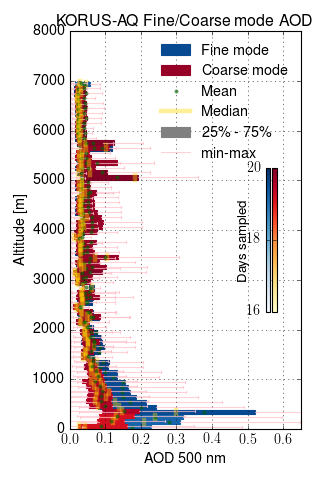

In [110]:
plt.figure(figsize=(4,6))
bp =plt.boxplot(bfaod,positions=np.array(baltf)-5.0,vert=False,
                showfliers=False,widths=90,showmeans=True,patch_artist=True)
plt.xlabel('AOD 500 nm')
plt.ylabel('Altitude [m]')
bl = plt.cm.YlOrRd
gr = plt.cm.Blues
pu.set_box_whisker_color(gr,bp,bndaysf)
    
bpc =plt.boxplot(bcaod,positions=np.array(baltc)+10.0,vert=False,
                 showfliers=False,widths=90,showmeans=True,patch_artist=True)
pu.set_box_whisker_color(bl,bpc,bndaysc)
bpc['boxes'][-1].set_color('grey')

ax = plt.gca()
plt.title('KORUS-AQ Fine/Coarse mode AOD')
plt.ylim(0,8000)
plt.yticks([0,1000,2000,3000,4000,5000,6000,7000,8000])
ax.set_yticklabels([0,1000,2000,3000,4000,5000,6000,7000,8000])
plt.xlim(0.0,0.65)
plt.grid()
plt.legend([bp['boxes'][5],bpc['boxes'][18],bpc['means'][0],bpc['medians'][0],bpc['boxes'][-1],bpc['whiskers'][0]],
           ['Fine mode','Coarse mode','Mean','Median','25\% - 75\%','min-max'],
           frameon=False,loc=1,numpoints=1)

scalarmapgr = plt.cm.ScalarMappable(cmap=gr)
scalarmapgr.set_array(bndaysf)
scalarmapbl = plt.cm.ScalarMappable(cmap=bl)
scalarmapbl.set_array(bndaysc)
cbaxesgr = plt.gcf().add_axes([0.83, 0.35, 0.015, 0.3])
cbg = plt.colorbar(scalarmapgr,cax=cbaxesgr)
cbaxesbl = plt.gcf().add_axes([0.85, 0.35, 0.015, 0.3])
cbb = plt.colorbar(scalarmapbl,cax=cbaxesbl)
cbg.set_ticks([0,6,12,16,18,20])
cbb.set_ticks([0,6,12,16,18,20]),cbb.set_ticklabels(['','','','',''])
cbaxesgr.yaxis.set_ticks_position('left'),cbaxesbl.yaxis.set_ticks_position('left')
cbaxesgr.text(-6.0,0.5,'Days sampled',rotation=90,verticalalignment='center')

plt.tight_layout()

plt.savefig(fp+'plot/KORUS_4STAR_fine_mode_AOD_vertical.png',
            transparent=True,dpi=500)

In [56]:
blats[0]=36.2

In [57]:
bndm = np.nanmax(blats)*1.0
bndm

37.594356000000005

In [100]:
cl = gr
for j,q in enumerate(blats):
    print j, q, cl(blats[j]*1.0/bndm)

0 36.2 (0.031372550874948502, 0.22477509221609901, 0.47386390847318316, 1.0)
1 35.6241051 (0.031372550874948502, 0.24101500084587171, 0.49797771315948636, 1.0)
2 36.2642631 (0.031372550874948502, 0.22477509221609901, 0.47386390847318316, 1.0)
3 36.4941735 (0.031372550874948502, 0.21665513790121266, 0.46180700613003151, 1.0)
4 36.1079282 (0.031372550874948502, 0.2288350693735422, 0.47989235964475896, 1.0)
5 36.6140062 (0.031372550874948502, 0.2125951607437695, 0.45577855495845571, 1.0)
6 36.4494213 (0.031372550874948502, 0.21665513790121266, 0.46180700613003151, 1.0)
7 36.8572909 (0.031372550874948502, 0.20853518358632631, 0.44975010378687991, 1.0)
8 36.98560035 (0.031372550874948502, 0.20447520642888312, 0.44372165261530405, 1.0)
9 36.149323 (0.031372550874948502, 0.22477509221609901, 0.47386390847318316, 1.0)
10 37.0671798 (0.031372550874948502, 0.20041522927143995, 0.43769320144372825, 1.0)
11 36.53188675 (0.031372550874948502, 0.21665513790121266, 0.46180700613003151, 1.0)
12 36.123

<IPython.core.display.Javascript object>


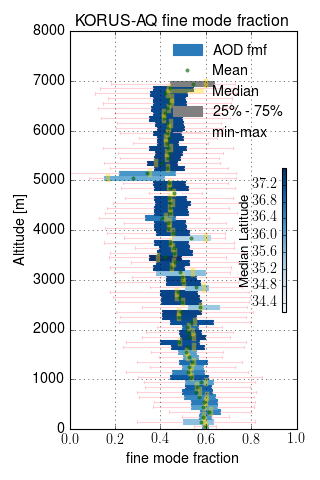

In [111]:
plt.figure(figsize=(4,6))
bp =plt.boxplot(beta,positions=np.array(balte),vert=False,
                showfliers=False,widths=90,showmeans=True,patch_artist=True)
plt.xlabel('fine mode fraction')
plt.ylabel('Altitude [m]')
bl = plt.cm.YlOrRd
gr = plt.cm.Blues
pu.set_box_whisker_color(gr,bp,blats,color_not_start_at_zero=True)
    
#bpc =plt.boxplot(bcaod,positions=np.array(baltc)+10.0,vert=False,
#                 showfliers=False,widths=90,showmeans=True,patch_artist=True)
#pu.set_box_whisker_color(bl,bpc,bndaysc)
bp['boxes'][-1].set_color('grey')

ax = plt.gca()
plt.title('KORUS-AQ fine mode fraction')
plt.ylim(0,8000)
plt.yticks([0,1000,2000,3000,4000,5000,6000,7000,8000])
ax.set_yticklabels([0,1000,2000,3000,4000,5000,6000,7000,8000])
plt.xlim(0.0,1.0)
plt.grid()
plt.legend([bp['boxes'][5],bp['means'][5],bp['medians'][5],bp['boxes'][-1],bp['whiskers'][5]],
           ['AOD fmf','Mean','Median','25\% - 75\%','min-max'],
           frameon=False,loc=1,numpoints=1)

scalarmapgr = plt.cm.ScalarMappable(cmap=gr)
scalarmapgr.set_array(blats)
#scalarmapbl = plt.cm.ScalarMappable(cmap=bl)
#scalarmapbl.set_array(bndays)
cbaxesgr = plt.gcf().add_axes([0.88, 0.35, 0.015, 0.3])
cbg = plt.colorbar(scalarmapgr,cax=cbaxesgr)
#cbaxesbl = plt.gcf().add_axes([0.85, 0.35, 0.015, 0.3])
#cbb = plt.colorbar(scalarmapbl,cax=cbaxesbl)
#cbg.set_ticks([0,6,12,15,18])
#cbb.set_ticks([0,6,12,15,18]),cbb.set_ticklabels(['','','','',''])
cbaxesgr.yaxis.set_ticks_position('left')#,cbaxesbl.yaxis.set_ticks_position('left')
cbaxesgr.text(-9.0,0.5,'Median Latitude',rotation=90,verticalalignment='center')

plt.tight_layout()

plt.savefig(fp+'plot/KORUS_4STAR_fine_mode_AOD_vertical.png',
            transparent=True,dpi=500)

## Calculate the autocorrelation of the fine and coarse mode AOD

In [55]:
fvals = {'utc':ar['Start_UTC'][fl],'alt':ar['GPS_Alt'][fl],'lat':ar['Latitude'][fl],'lon':ar['Longitude'][fl],
        'aod0500':ar['AOD0501'][fl],'aod1040':ar['AOD1040'][fl],'aodf':fmf['tauf'][fl],'aodc':fmf['tauc'][fl],'eta':fmf['eta'][fl]}

In [56]:
dfvals = get_segments(f_level,fvals,nsep=100)

In [57]:
ddfv = get_distances(dfvals)

Now the segments are identified and the cumulative distances are quantified, we must interpolate over the segments, to remove any missing data.

In [58]:
def interp_dist_fmf(d,dist=0.12):
    'function to insterpolate the AOD from the dict to an even grid spacing accroding to distance (default 0.12 km)'
    d['cdist_n'],d['aod_nf'],d['aod_nc'],d['eta_n'] = [],[],[],[]
    for i,cd in enumerate(d['cumdist']):        
        d['cdist_n'].append(np.arange(cd.min(),cd.max(),dist))
        if np.sum(np.isfinite(d['aodf'][i]))/float(len(d['aodf'][i])) < 0.75: # check if at least 75% of the segment is valid
            af = np.array(np.nan)
            ac = np.array(np.nan)
            et = np.array(np.nan)
        else:
            try:
                fcdf = interpolate.interp1d(cd,d['aodf'][i])
                af = fcdf(d['cdist_n'][i])
                fcdc = interpolate.interp1d(cd,d['aodc'][i])
                ac = fcdc(d['cdist_n'][i])
                fcde = interpolate.interp1d(cd,d['eta'][i])
                et = fcde(d['cdist_n'][i])
            except TypeError:
                af = np.array(np.nan)
                ac = np.array(np.nan)
                et = np.array(np.nan)
        d['aod_nf'].append(af)
        d['aod_nc'].append(ac)
        d['eta_n'].append(et)

In [59]:
interp_dist_fmf(dfvals)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in divide
  


In [79]:
dfvals['autocor_f'],dfvals['autocor_c'],dfvals['autocor_e'] = [] ,[],[]
for i,a in enumerate(dfvals['aod_nf']):
    #auf,auc,eut = [],[],[]
    try:
        auf = autocorr5(a)
        auc = autocorr5(dfvals['aod_nc'][i])
        eut = autocorr5(dfvals['eta_n'][i])
    except:
        auf = np.array([np.nan])
        auc = np.array([np.nan])
        eut = np.array([np.nan])
    dfvals['autocor_f'].append(auf[:])
    dfvals['autocor_c'].append(auc[:])
    dfvals['autocor_e'].append(eut[:])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  


In [61]:
len(dfvals['aod_nf'])

254

In [63]:
dfvals['aod_nf'][i]

array([ 0.21168928,  0.21168928,  0.22265097,  0.18114966,  0.16894319,
        0.14674936,  0.14672834,  0.15728576,  0.15866941,  0.15583983,
        0.15088238,  0.14901555,  0.16081026,  0.14932608,  0.1555551 ,
        0.17023048,  0.17848   ,  0.18110492,  0.17049711,  0.16931724,
        0.18223482,  0.14611177,  0.1545911 ,  0.13131177,  0.1258004 ,
        0.12972138,  0.13774946,  0.12761112,  0.13404419,  0.12955565,
        0.12202962,  0.1221877 ,  0.12350845,  0.1254407 ,  0.12568505,
        0.12544021,  0.13007457,  0.1446063 ,  0.15497749,  0.15668431,
        0.1568587 ,  0.15655648,  0.15642829,  0.14921399,  0.15069467,
        0.15802497,  0.15902921,  0.16477269,  0.1716531 ,  0.16922366,
        0.17200509,  0.1778292 ,  0.18154031,  0.17671224,  0.17589078,
        0.19670331,  0.16789232,  0.1615145 ,  0.17067411,  0.16942956,
        0.1661013 ,  0.1644251 ,  0.15779499,  0.16391675,  0.16363495,
        0.15439554,  0.15441867,  0.15563899,  0.16139322,  0.15

In [64]:
dfvals['cdist_n'][i]

array([  0.  ,   0.12,   0.24,   0.36,   0.48,   0.6 ,   0.72,   0.84,
         0.96,   1.08,   1.2 ,   1.32,   1.44,   1.56,   1.68,   1.8 ,
         1.92,   2.04,   2.16,   2.28,   2.4 ,   2.52,   2.64,   2.76,
         2.88,   3.  ,   3.12,   3.24,   3.36,   3.48,   3.6 ,   3.72,
         3.84,   3.96,   4.08,   4.2 ,   4.32,   4.44,   4.56,   4.68,
         4.8 ,   4.92,   5.04,   5.16,   5.28,   5.4 ,   5.52,   5.64,
         5.76,   5.88,   6.  ,   6.12,   6.24,   6.36,   6.48,   6.6 ,
         6.72,   6.84,   6.96,   7.08,   7.2 ,   7.32,   7.44,   7.56,
         7.68,   7.8 ,   7.92,   8.04,   8.16,   8.28,   8.4 ,   8.52,
         8.64,   8.76,   8.88,   9.  ,   9.12,   9.24,   9.36,   9.48,
         9.6 ,   9.72,   9.84,   9.96,  10.08,  10.2 ,  10.32,  10.44,
        10.56,  10.68,  10.8 ,  10.92,  11.04,  11.16,  11.28,  11.4 ,
        11.52,  11.64,  11.76,  11.88,  12.  ,  12.12,  12.24,  12.36,
        12.48,  12.6 ,  12.72,  12.84,  12.96,  13.08,  13.2 ,  13.32,
      

In [80]:
dfvals['autocor_f'][i]

array([             nan,              nan,              nan, ...,
         1.11008864e-05,   2.89227404e-06,  -5.78250967e-06])

In [111]:
mc = np.max([len(m) for m in dfvals['autocor_c']])
imc = np.argmax([len(m) for m in dfvals['autocor_c']])

In [113]:
cdist = dfvals['cdist_n'][imc]

In [123]:
autocor_c = np.zeros((len(dfvals['autocor_c']),mc))+np.nan
autocor_f = np.zeros((len(dfvals['autocor_f']),mc))+np.nan
autocor_e = np.zeros((len(dfvals['autocor_e']),mc))+np.nan

In [124]:
for i,c in enumerate(dfvals['autocor_c']): autocor_c[i,:len(c)]=c
for i,c in enumerate(dfvals['autocor_f']): autocor_f[i,:len(c)]=c
for i,c in enumerate(dfvals['autocor_e']): autocor_e[i,:len(c)]=c

### Plot out the autocorrelation 

<IPython.core.display.Javascript object>


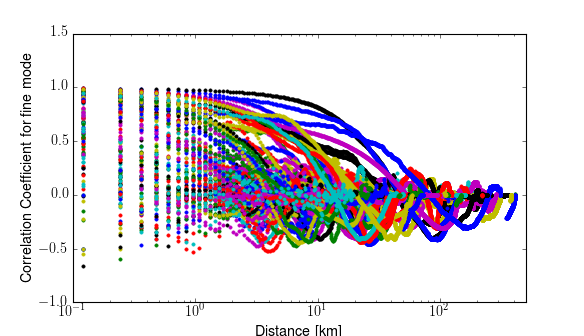

(0.1, 500)

In [83]:
plt.figure()
for i,j in enumerate(dfvals['cdist_n']):
    try:
        if len(j)<1: continue
        plt.plot(j,dfvals['autocor_f'][i],'.')
    except:
        continue
plt.ylabel('Correlation Coefficient for fine mode')
plt.xlabel('Distance [km]')
plt.xscale('log')
plt.xlim(0.1,500)

<IPython.core.display.Javascript object>


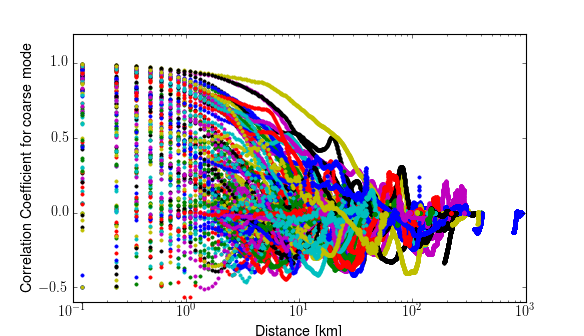

In [84]:
plt.figure()
for i,j in enumerate(dfvals['cdist_n']):
    try:
        plt.plot(j,dfvals['autocor_c'][i],'.')
    except:
        pass
plt.ylabel('Correlation Coefficient for coarse mode')
plt.xlabel('Distance [km]')
plt.xscale('log')

In [110]:
dfvals['cdist_n'][1:3]

[array([  0.  ,   0.12,   0.24,   0.36,   0.48,   0.6 ,   0.72,   0.84,
          0.96,   1.08,   1.2 ,   1.32,   1.44,   1.56,   1.68,   1.8 ,
          1.92,   2.04,   2.16,   2.28,   2.4 ,   2.52,   2.64,   2.76,
          2.88,   3.  ,   3.12,   3.24,   3.36,   3.48,   3.6 ,   3.72,
          3.84,   3.96,   4.08,   4.2 ,   4.32,   4.44,   4.56,   4.68,
          4.8 ,   4.92,   5.04,   5.16,   5.28,   5.4 ,   5.52,   5.64,
          5.76,   5.88,   6.  ,   6.12,   6.24,   6.36,   6.48,   6.6 ,
          6.72,   6.84,   6.96,   7.08,   7.2 ,   7.32,   7.44,   7.56,
          7.68,   7.8 ,   7.92,   8.04,   8.16,   8.28,   8.4 ,   8.52,
          8.64,   8.76,   8.88,   9.  ,   9.12,   9.24,   9.36,   9.48,
          9.6 ,   9.72,   9.84,   9.96,  10.08,  10.2 ,  10.32,  10.44,
         10.56,  10.68,  10.8 ,  10.92,  11.04,  11.16,  11.28,  11.4 ,
         11.52,  11.64,  11.76,  11.88,  12.  ,  12.12,  12.24,  12.36,
         12.48,  12.6 ,  12.72,  12.84,  12.96,  13.08,  13.2 , 

In [133]:
autocor_c_ma = np.ma.masked_array(autocor_c,mask=np.isnan(autocor_c))

In [157]:
def make_binned(x,alt,fl,bn,flb):
    'Function to create binned data for a set range, usually for altitude'
    import numpy as np
    binned_ang,binned_alt,binned_num = [],[],[]
    for i,b in enumerate(bn[:-1]):
        flaa = (alt[flb]>=b) & (alt[flb]<bn[i+1])
        binned_ang.append(x[:,flb][flaa])
        binned_alt.append(np.mean([b,bn[i+1]]))
        binned_num.append(len(x[fl][:,flaa]))
    return binned_ang,binned_alt,binned_num,binned_ndays

In [154]:
bnc = np.logspace(0.1,3.0)

In [155]:
bnc

array([    1.25892541,     1.44272539,     1.6533597 ,     1.89474609,
           2.1713743 ,     2.48838954,     2.85168821,     3.26802759,
           3.74515148,     4.29193426,     4.91854597,     5.63664143,
           6.45957703,     7.40265918,     8.48342898,     9.72198848,
          11.14137457,    12.7679875 ,    14.63208187,    16.76832937,
          19.21646368,    22.0220195 ,    25.23717948,    28.92174481,
          33.14424749,    37.98322505,    43.52868128,    49.8837603 ,
          57.16666502,    65.51285569,    75.0775694 ,    86.03870748,
          98.60014441,   112.99551984,   129.49258422,   148.3981789 ,
         170.06394329,   194.89285531,   223.34672663,   255.95479227,
         293.32355425,   336.14806238,   385.224842  ,   441.46670918,
         505.91974884,   579.78277172,   664.42961191,   761.43467988,
         872.60224609,  1000.        ])

In [163]:
auc = make_binned(autocor_c,cdist,np.isfinite(autocor_c),bnc)

IndexError: too many indices for array

In [161]:
b = bnc[0]
i = 0
fl = np.isfinite(autocor_c)

In [162]:
flaa = (cdist[fl]>=b) & (cdist[fl]<bnc[i+1])

IndexError: too many indices for array

In [156]:
autocor_c.shape

(254, 7728)

<IPython.core.display.Javascript object>


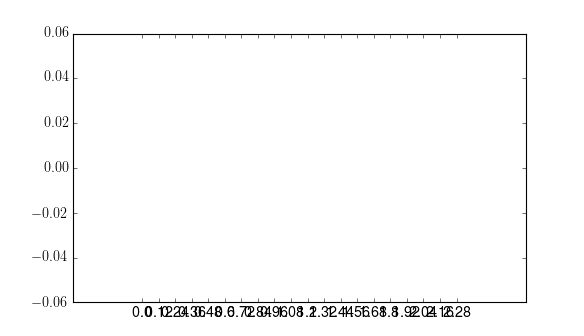

In [135]:
plt.figure()
bp = plt.boxplot(autocor_c_ma[:,0:20],positions=cdist[0:20],vert=True,
            showfliers=False,widths=90,showmeans=True,patch_artist=True) 

In [118]:
autocor_c.shape

(254, 7728)

In [134]:
autocor_c_ma[:,0:20]

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [0.9999999999999999 0.9486627690818289 0.8831168001028755 ...,
  0.039102311665049704 -0.01640918562484604 -0.07094585321604496]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [1.0 0.9001915471544049 0.7544360646884336 ..., -0.38939146620925097
  -0.332314722022007 -0.2539286515417791]
 [-- -- -- ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [False False False ..., False False False]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [False False False ..., False False False]
 [ True  True  True ...,  True  True  True]],
       fill_value = 1e+20)

In [130]:
np.isfinite(autocor_c)

array([[False, False, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [136]:
autocor_c_ma[:,0]

masked_array(data = [-- 0.9999999999999999 -- -- 0.9999999999999998 1.0 -- 1.0 -- -- --
 1.0000000000000002 1.0 1.0 -- 1.0 1.0 1.0000000000000002 1.0 -- -- -- 1.0
 0.9999999999999998 -- 0.9999999999999999 -- 1.0 -- 1.0 1.0 1.0
 0.9999999999999997 1.0 -- -- 1.0 1.0000000000000004 0.9999999999999999
 0.9999999999999998 -- 1.0 1.0 1.0 1.0 0.9999999999999999 --
 1.0000000000000002 1.0000000000000002 1.0000000000000002 -- 1.0
 0.9999999999999999 -- 1.0 -- -- -- -- -- -- 1.0 -- -- 0.9999999999999998
 -- -- -- -- -- 1.0 0.9999999999999999 1.0000000000000002 -- -- -- 1.0 --
 -- 0.9999999999999999 -- 0.9999999999999998 -- -- 1.0000000000000002
 0.9999999999999998 1.0 -- 1.0000000000000002 -- -- -- -- -- -- -- 1.0 --
 1.0 --],
             mask = [ True False  True  True False False  True False  True  True  True False
 False False  True False False False False  True  True  True False False
  True False  True False  True False False False False False  True  True
 False False False False  True Fal